---

<h1 style="text-align: center;"><b>Детектор нефтяных скважин</b></h1>

## Введение

### Описание проблемы

Нефть и газ остаются краеугольным камнем мировой энергетики, играя ключевую роль в экономическом развитии и благосостоянии населения. Как отмечается в Статистическом ежегоднике мировой энергетики BP за 2022 год, эффективное управление нефтегазовыми ресурсами приобретает все большую важность в контексте растущих экологических проблем и необходимости обеспечения энергетической безопасности.

Нефтяные скважины являются ключевым индикатором состояния нефтегазовых запасов. Их количество и распределение предоставляют ценную информацию о динамике добычи и потенциале месторождений. Удаленный мониторинг с использованием спутниковых снимков позволяет отслеживать глобальную эксплуатацию нефтяных ресурсов и оценивать уровень добычи в разных регионах.

### Актуальность проекта:
Разработка ПО для автоматического обнаружения нефтяных скважин на спутниковых снимках имеет ряд преимуществ:
* Повышение эффективности: автоматизация процесса обнаружения скважин позволяет сократить время и ресурсы, затрачиваемые на ручной анализ изображений.
* Улучшение точности: алгоритмы компьютерного зрения способны обнаруживать скважины с большей точностью, чем человек, снижая риск ошибок и пропусков.
* Поддержка принятия решений: данные о количестве и распределении скважин помогают в планировании добычи, оценке запасов и прогнозировании энергетических потребностей.
* Экологический мониторинг: удаленный мониторинг позволяет отслеживать состояние окружающей среды вблизи нефтяных месторождений и выявлять потенциальные экологические угрозы.

Проект направлен на разработку модели глубокого обучения, способной эффективно обнаруживать нефтяные скважины на спутниковых снимках, и создание веб-приложения для её практического применения.

### Цель проекта:
Разработать и внедрить модель глубокого обучения для автоматического обнаружения нефтяных скважин на спутниковых снимках с высокой точностью и надежностью, особенно в условиях перекрытия объектов, сложного фона и различных углов обзора.

### Результаты первой версии:
* Обученная модель YOLOv8: модель обнаруживает скважины на спутниковых снимках с учетом различных факторов, влияющих на их внешний вид.
* Веб-приложение Streamlit: приложение предоставляет пользователям интерфейс для загрузки изображений, запуска процесса обнаружения и визуализацию результатов с bounding boxes и метками классов.
* [Демонстрация приложения](https://well-detector-yolov8-ko3oxyhhgpthwubuhvjdmt.streamlit.app/)

### Обзор используемых технологий и библиотек
* YOLOv8: современная архитектура глубокого обучения для обнаружения объектов, известная своей скоростью и точностью. Она используется в проекте для обучения модели, способной распознавать нефтяные скважины на спутниковых снимках.
* Roboflow: платформа для управления данными и предобработки изображений. Она используется для загрузки, аннотирования и подготовки данных для обучения модели YOLOv8.
* Streamlit: библиотека Python для создания веб-приложений с использованием машинного обучения. Она применяется для разработки веб-интерфейса для взаимодействия с обученной моделью YOLOv8.

### Анализ ошибок:
* Трудности с обнаружением перекрывающихся объектов: модель испытывает сложности с точной идентификацией и локализацией скважин, которые перекрываются друг с другом или другими объектами на изображении.
* Ложные срабатывания: в некоторых случаях модель может ошибочно идентифицировать другие объекты, например, нефтяные резервуары или схожие по форме сооружения, как скважины.
* Пропущенные обнаружения: модель может пропускать скважины с низким контрастом, маленькие скважины или скважины, расположенные в сложных условиях освещения или фона.

### Пути решения:
* Использования контекстной информации: анализ окружающих объектов
* OBB-обнаружение
* Комбинирование обнаружения и сегментации: позволит сначала локализовать скважины, а затем получить точные границы и отделить перекрывающиеся объекты.
* Использование более крупных моделей
* Обучение на данных с разными масштабами
* Расширение и диверсификация датасета: разнообразить датасет фонами, углами обзора, типами скважин и степенями перекрытия.

### Идеальный прототип:

Идеальный прототип приложения представляет собой веб-сервис, который регулярно, с определенной периодичностью и на основе заданных эвристик, выполняет поиск по спутниковым снимкам. Он отображает на карте координаты скважин и примерную дату их появления.

Кроме того, приложение предоставляет дополнительную ГИС-информацию, включая:
* Название месторождения
* Информация о месторождении, на котором обнаружены скважины.
* Тип ресурса (нефть, газ или конденсат)
* Статус скважины (активная, заброшенная)
* Экологические данные


## Подготовка данных



### Импорты

In [ ]:
# установим библиотеки
!pip install roboflow
%pip install ultralytics

In [ ]:
# импорты
import yaml
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ultralytics
import zipfile
import gdown

from ultralytics import YOLO
from roboflow import Roboflow
from PIL import Image
from IPython import display

### Описание датасета

Датасет с фото скважин со спутников берется из двух статей:  
 [Oil Well Detection under Occlusion in Remote Sensing Images Using the Improved YOLOv5 Model, 2023](https://www.mdpi.com/2072-4292/15/24/5788#)
  
 [An Oil Well Dataset Derived from Satellite-Based Remote Sensing, 2021](https://www.mdpi.com/2072-4292/13/6/1132)


> NEPU_OWOD-1.0 (Northeast Petroleum University - Oil Well Object Detection)  covers an area of 369 square kilometres and includes 1192 oil wells in 432 images (with a resolution of 0.41m per pixel).  The images are 768 * 768 pixels, 768 * 1024 pixels and 1024 * 1024 pixels.

> NEPU_OWOD-3.0 (Northeast Petroleum University - Oil Well Object Detection) California includes 1028 oil wells in 130 images (with a resolution of 0.48m per pixel).  The images are 512 * 512 pixels.

**The format of the data set complies with the VOC2007 format.**

Датасет смешивается (562 изображения с аннотациями) и предобрабатывается в Roboflow.  
Preprocessing:
* Auto-Orient: Applied
* Resize: Stretch to 640x640

Деление на выборки:
* TRAIN SET - 70% - 393
* VALID SET - 20% - 113
* TEST SET - 10% - 56

### Загрузка данных

In [ ]:
rf = Roboflow(api_key="14IeNhZcYrzhO4N0TBQW")
project = rf.workspace("well-detector").project("wells-wvkli")
dataset = project.version(5).download("yolov8")

In [ ]:
# Скорректируем настройки путей в датасете.
data = {
    'names': ['oilwell'],
    'nc': 1,
    'roboflow': {'license': 'CC BY 4.0',
    'project': 'wells-wvkli',
    'url': 'https://universe.roboflow.com/well-detector/wells-wvkli/dataset/5',
    'version': 4,
    'workspace': 'well-detector'},
    'train' :  '/content/wells-5/train/images',
    'val' :  '/content/wells-5/valid/images',
    'test' :  '/content/wells-5/test/images',
    }

with open('/content/wells-5/data.yaml', 'w') as f:
    yaml.dump(data, f)

with open('/content/wells-5/data.yaml', 'r') as f:
    data_yaml = yaml.safe_load(f)
    display(data_yaml)

{'names': ['oilwell'],
 'nc': 1,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'wells-wvkli',
  'url': 'https://universe.roboflow.com/well-detector/wells-wvkli/dataset/5',
  'version': 4,
  'workspace': 'well-detector'},
 'test': '/content/wells-5/test/images',
 'train': '/content/wells-5/train/images',
 'val': '/content/wells-5/valid/images'}

### Визуализация датасета

In [ ]:
def select_random_images(directory, num_images=3):
    """ Выбирает случайные .jpg файлы из указанной директории. """
    # Получение списка всех .jpg файлов в директории
    jpg_files = [file for file in os.listdir(directory) if file.endswith('.jpg')]

    # Проверка, достаточно ли файлов в директории
    if len(jpg_files) < num_images:
        raise ValueError(f"В директории недостаточно файлов для выбора {num_images} изображений")

    # Выбор случайных файлов
    selected_files = random.sample(jpg_files, num_images)
    selected_labels = [file.replace('.jpg', '.txt') for file in selected_files]
    # Возвращение полных путей к файлам
    return [os.path.join(directory, file) for file in selected_files], [os.path.join(directory.replace('images', 'labels'), file) for file in selected_labels]

def yolo_to_bbox(img_width, img_height, x_center, y_center, width, height):
    """ Конвертирует координаты YOLO в координаты bounding box. """
    x_min = (x_center - width / 2) * img_width
    y_min = (y_center - height / 2) * img_height
    box_width = width * img_width
    box_height = height * img_height
    return x_min, y_min, box_width, box_height

def plot_yolo_bboxes(image_paths, annotation_paths):
    """ Отображает несколько изображений с bounding boxes в ряд. """
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Измените размер, если необходимо

    for idx, (image_path, annotation_path) in enumerate(zip(image_paths, annotation_paths)):
        with Image.open(image_path) as img:
            img_width, img_height = img.size
            axes[idx].imshow(img)
            axes[idx].axis('off')  # Отключить оси для лучшей визуализации

            with open(annotation_path) as file:
                for line in file.readlines():
                    class_id, x_center, y_center, width, height = map(float, line.split())
                    x_min, y_min, box_width, box_height = yolo_to_bbox(img_width, img_height, x_center, y_center, width, height)

                    rect = patches.Rectangle((x_min, y_min), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
                    axes[idx].add_patch(rect)
                    axes[idx].text(x_min, y_min, 'oil', backgroundcolor='red', color='black', fontsize=5, verticalalignment='baseline')
    return fig

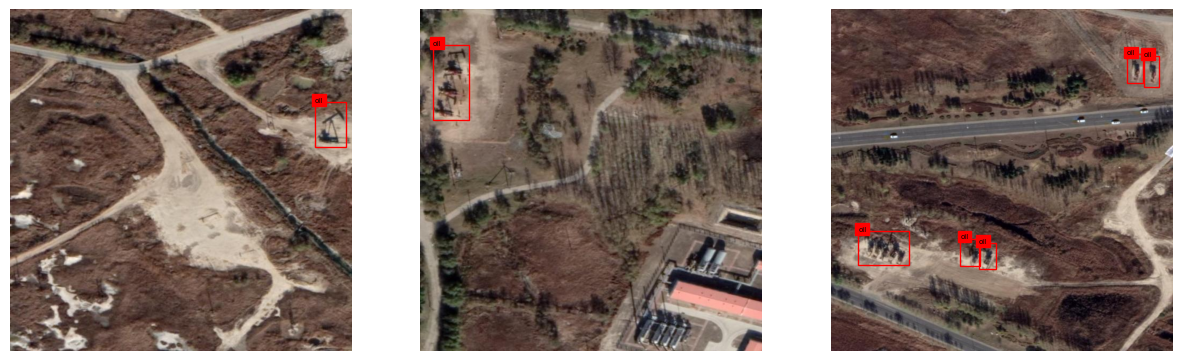

In [ ]:
fig = plot_yolo_bboxes(*select_random_images('/content/wells-5/train/images', num_images=3))
plt.show()

## Обучение модели


In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/166.8 GB disk)


### YOLO-v8n

In [ ]:
# возьмем модель Nano для возможности развернуть ее на бесплатном сервере.
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Тренируем модель, добавим аугментации для данных, повороты, отражения
results = model.train(data='/content/wells-5/data.yaml', epochs=201, imgsz=640, batch=5, device='cuda', degrees=15, flipud=0.5,fliplr=0.5)

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.0MB/s]


Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/wells-5/data.yaml, epochs=201, time=None, patience=50, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/wells-5/train/labels... 393 images, 0 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<00:00, 1155.54it/s]

train: New cache created: /content/wells-5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/wells-5/valid/labels... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<00:00, 585.86it/s]

val: New cache created: /content/wells-5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 201 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/201     0.969G      2.289      2.945      1.519         35        640: 100%|██████████| 79/79 [00:15<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]

                   all        113        442      0.522       0.17      0.284      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/201     0.839G      1.918      2.056      1.388         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.22it/s]

                   all        113        442      0.589      0.604      0.613      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/201     0.839G      1.914      1.981      1.367         11        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.58it/s]


                   all        113        442      0.588      0.633      0.557      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/201     0.843G      2.006      1.986      1.405         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.49it/s]


                   all        113        442      0.474      0.457      0.455      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/201     0.839G      1.956      1.759      1.363         26        640: 100%|██████████| 79/79 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.19it/s]

                   all        113        442       0.53      0.647      0.603       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/201     0.839G       1.78      1.662      1.336         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.93it/s]

                   all        113        442      0.687      0.728      0.748        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/201     0.839G      1.774      1.529      1.319          8        640: 100%|██████████| 79/79 [00:12<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.03it/s]

                   all        113        442      0.739      0.704      0.783      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/201     0.839G       1.77      1.449      1.319          4        640: 100%|██████████| 79/79 [00:11<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.30it/s]

                   all        113        442      0.704      0.656       0.74      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/201     0.839G      1.773      1.414      1.296         16        640: 100%|██████████| 79/79 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.21it/s]

                   all        113        442      0.766      0.747      0.809      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/201     0.843G      1.708      1.353      1.298         12        640: 100%|██████████| 79/79 [00:10<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.74it/s]

                   all        113        442      0.747      0.755      0.821      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/201     0.839G      1.726       1.34      1.294         15        640: 100%|██████████| 79/79 [00:11<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.08it/s]

                   all        113        442      0.703       0.74      0.759      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/201     0.843G      1.793      1.394      1.293          4        640: 100%|██████████| 79/79 [00:11<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.43it/s]

                   all        113        442      0.773      0.746      0.812      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/201     0.839G      1.697      1.288       1.26         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.98it/s]

                   all        113        442      0.735      0.783      0.801      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/201     0.843G      1.733       1.26      1.271         23        640: 100%|██████████| 79/79 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.16it/s]

                   all        113        442      0.722      0.701      0.758      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/201     0.839G      1.666       1.28      1.258         19        640: 100%|██████████| 79/79 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.54it/s]

                   all        113        442      0.722       0.76      0.794      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/201     0.839G      1.713      1.316       1.29         34        640: 100%|██████████| 79/79 [00:11<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.14it/s]

                   all        113        442      0.776      0.771      0.824      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/201     0.839G      1.675      1.272      1.282          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.91it/s]

                   all        113        442      0.737      0.756      0.803      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/201     0.843G      1.739      1.227      1.278         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.65it/s]

                   all        113        442      0.789      0.692      0.778      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/201     0.837G      1.665      1.187      1.259         11        640: 100%|██████████| 79/79 [00:11<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.56it/s]

                   all        113        442      0.794      0.766      0.843      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/201     0.839G      1.659      1.121      1.262         22        640: 100%|██████████| 79/79 [00:11<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.42it/s]

                   all        113        442      0.751      0.847      0.835      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/201     0.839G      1.647      1.144      1.231         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.16it/s]


                   all        113        442      0.694      0.785       0.78      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/201     0.843G      1.684      1.164      1.256         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.55it/s]

                   all        113        442      0.794       0.76      0.844      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/201     0.843G      1.653      1.146      1.239         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.02it/s]

                   all        113        442      0.762       0.79      0.834      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/201     0.843G      1.629      1.153      1.255         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.89it/s]

                   all        113        442      0.776      0.799      0.841      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/201     0.839G      1.621      1.112      1.243         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.56it/s]

                   all        113        442       0.82      0.822      0.881      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/201     0.839G       1.64       1.13      1.233         26        640: 100%|██████████| 79/79 [00:11<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.31it/s]

                   all        113        442      0.772       0.81      0.866      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/201     0.843G       1.59      1.117      1.256         15        640: 100%|██████████| 79/79 [00:11<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.67it/s]

                   all        113        442      0.833      0.722      0.826      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/201     0.839G      1.637      1.111      1.247         38        640: 100%|██████████| 79/79 [00:11<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.93it/s]

                   all        113        442       0.81      0.774      0.852      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/201     0.841G      1.642      1.055       1.25         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.65it/s]

                   all        113        442      0.749       0.81      0.836      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/201     0.841G      1.606      1.094      1.227         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.19it/s]

                   all        113        442      0.768      0.824      0.864      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/201     0.839G      1.587       1.08      1.223         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.40it/s]

                   all        113        442      0.799      0.772      0.842      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/201     0.841G      1.605      1.062      1.235         25        640: 100%|██████████| 79/79 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.13it/s]

                   all        113        442      0.784      0.814      0.859      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/201     0.841G      1.645      1.076      1.255         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.13it/s]

                   all        113        442      0.768      0.844      0.872      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/201     0.843G      1.639      1.044      1.232          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.15it/s]

                   all        113        442      0.802      0.772      0.844      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/201     0.841G      1.573      1.043      1.242         11        640: 100%|██████████| 79/79 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.38it/s]

                   all        113        442      0.823      0.823      0.877        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/201     0.839G      1.591      1.034      1.227         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.15it/s]


                   all        113        442      0.808       0.82      0.881      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/201     0.839G      1.615      1.075      1.244         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.44it/s]

                   all        113        442      0.825      0.768      0.858      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/201     0.843G      1.628      1.088       1.25         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.84it/s]


                   all        113        442      0.777      0.753      0.815      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/201     0.839G      1.611      1.032      1.213          7        640: 100%|██████████| 79/79 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.55it/s]

                   all        113        442      0.787      0.835      0.875      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/201     0.841G      1.581      1.008      1.222         17        640: 100%|██████████| 79/79 [00:11<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.31it/s]

                   all        113        442      0.774      0.801       0.86      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/201     0.839G      1.571      1.008       1.19         23        640: 100%|██████████| 79/79 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.88it/s]

                   all        113        442      0.792      0.835      0.876      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/201     0.843G      1.523      1.005      1.205          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.44it/s]


                   all        113        442      0.786      0.874      0.885      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/201     0.839G      1.545     0.9903      1.198         13        640: 100%|██████████| 79/79 [00:11<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.62it/s]

                   all        113        442      0.771       0.86      0.866      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/201     0.839G       1.61      1.031      1.224         11        640: 100%|██████████| 79/79 [00:11<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.82it/s]

                   all        113        442      0.816      0.791      0.879      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/201     0.837G      1.546     0.9876      1.219          8        640: 100%|██████████| 79/79 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.89it/s]

                   all        113        442      0.797      0.837      0.879      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/201     0.837G       1.59     0.9887      1.235          6        640: 100%|██████████| 79/79 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.63it/s]

                   all        113        442      0.793      0.821      0.863      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/201     0.839G      1.539     0.9653      1.208         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.33it/s]

                   all        113        442      0.825      0.805      0.862      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/201     0.839G      1.553      1.018      1.224          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.87it/s]

                   all        113        442      0.804      0.829      0.879      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/201     0.854G      1.545       0.96      1.214         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.53it/s]

                   all        113        442       0.82      0.801      0.882      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/201     0.854G      1.555      0.958      1.219         32        640: 100%|██████████| 79/79 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.63it/s]

                   all        113        442      0.822      0.826      0.878      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/201     0.839G      1.566     0.9611      1.199          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.53it/s]

                   all        113        442       0.78      0.887      0.881      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/201     0.854G      1.516     0.9427      1.182         17        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.44it/s]

                   all        113        442      0.788      0.833       0.87      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/201     0.839G      1.541     0.9717      1.198         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.57it/s]

                   all        113        442      0.823      0.844      0.893      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/201     0.841G      1.497     0.9067      1.171         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.57it/s]

                   all        113        442      0.817      0.847      0.903      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/201     0.854G      1.535      0.941      1.213         34        640: 100%|██████████| 79/79 [00:11<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.68it/s]

                   all        113        442      0.846      0.796      0.883      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/201     0.839G      1.566     0.9569      1.201         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.40it/s]

                   all        113        442      0.815      0.889        0.9      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/201     0.843G      1.558     0.9722      1.214          4        640: 100%|██████████| 79/79 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.31it/s]

                   all        113        442      0.876      0.818      0.897      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/201     0.841G      1.511     0.9252      1.197         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.16it/s]


                   all        113        442      0.813      0.855      0.887      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/201     0.837G        1.5     0.9209      1.172          6        640: 100%|██████████| 79/79 [00:11<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.38it/s]

                   all        113        442      0.812      0.826      0.876      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/201     0.843G      1.532     0.9132      1.217         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.87it/s]

                   all        113        442      0.841      0.827      0.889      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/201     0.837G      1.488     0.9277      1.193         10        640: 100%|██████████| 79/79 [00:11<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.01it/s]

                   all        113        442      0.829      0.865      0.901      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/201     0.843G       1.51     0.9103      1.196         37        640: 100%|██████████| 79/79 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.93it/s]

                   all        113        442       0.86      0.823      0.919      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/201     0.837G      1.499     0.9397      1.199         43        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.37it/s]

                   all        113        442      0.826      0.796      0.889      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/201     0.841G      1.483     0.8991      1.199         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.81it/s]

                   all        113        442      0.834      0.867      0.907      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/201     0.843G      1.524     0.9122      1.207         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.58it/s]

                   all        113        442       0.85      0.862      0.907      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/201     0.843G      1.513     0.8766      1.162         28        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.97it/s]

                   all        113        442      0.859      0.851      0.907      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/201     0.839G      1.508      0.899      1.188         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.27it/s]

                   all        113        442      0.804      0.872      0.892      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/201     0.839G      1.522     0.9077      1.205         16        640: 100%|██████████| 79/79 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.64it/s]

                   all        113        442       0.82      0.836      0.893      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/201     0.843G      1.502     0.8968      1.235         19        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.00it/s]

                   all        113        442      0.836      0.882      0.915      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/201     0.841G        1.5       0.92      1.183         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.56it/s]

                   all        113        442      0.813      0.874      0.885      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/201     0.837G      1.494     0.8848      1.185         10        640: 100%|██████████| 79/79 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.03it/s]

                   all        113        442      0.845      0.841      0.902      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/201     0.837G      1.452     0.8777      1.166         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.59it/s]

                   all        113        442      0.775      0.827      0.863      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/201     0.839G      1.467     0.9004      1.188          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.11it/s]

                   all        113        442      0.857      0.826      0.906      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/201     0.839G      1.521        0.9      1.224          4        640: 100%|██████████| 79/79 [00:10<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        113        442      0.844      0.844      0.909      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/201     0.839G      1.486     0.8875      1.172         26        640: 100%|██████████| 79/79 [00:11<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.22it/s]

                   all        113        442      0.766       0.86       0.87      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/201     0.839G      1.471     0.8647      1.173         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.82it/s]

                   all        113        442       0.86      0.831      0.895      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/201     0.856G      1.486     0.8767        1.2         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.22it/s]

                   all        113        442       0.81      0.849      0.886      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/201     0.839G      1.464     0.8713      1.187         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.36it/s]

                   all        113        442      0.818      0.862      0.901      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/201     0.851G      1.519     0.8672      1.205         23        640: 100%|██████████| 79/79 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.76it/s]

                   all        113        442      0.832      0.873      0.913      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/201     0.839G      1.455     0.8616      1.176         10        640: 100%|██████████| 79/79 [00:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.53it/s]

                   all        113        442      0.863      0.854      0.923      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/201     0.841G      1.451     0.8391       1.17         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.15it/s]


                   all        113        442      0.862      0.835      0.912      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/201     0.843G      1.475     0.8588      1.172         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.89it/s]

                   all        113        442      0.854      0.835      0.911      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/201     0.843G      1.504     0.8739      1.185         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.95it/s]

                   all        113        442      0.846      0.831      0.901       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/201     0.837G       1.49     0.8564      1.196         16        640: 100%|██████████| 79/79 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.90it/s]

                   all        113        442      0.876      0.835      0.913      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/201     0.841G      1.486     0.8586        1.2         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.11it/s]


                   all        113        442      0.859      0.846      0.924      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/201     0.837G      1.484     0.8622      1.193          7        640: 100%|██████████| 79/79 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.22it/s]

                   all        113        442      0.837      0.882      0.917      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/201     0.843G      1.469     0.8667       1.19          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.97it/s]

                   all        113        442      0.799       0.88      0.893      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/201     0.839G      1.429      0.831      1.163         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.90it/s]

                   all        113        442      0.871      0.846      0.907      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/201     0.837G      1.442     0.8504      1.173         31        640: 100%|██████████| 79/79 [00:11<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        113        442       0.82      0.884      0.913      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/201     0.837G      1.456     0.8372      1.166          8        640: 100%|██████████| 79/79 [00:11<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.29it/s]

                   all        113        442      0.888      0.846      0.922      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/201     0.841G       1.41     0.8408      1.135         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.21it/s]

                   all        113        442      0.828      0.885      0.917      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/201     0.841G      1.411     0.8447      1.156         27        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.86it/s]

                   all        113        442      0.834      0.857      0.914      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/201     0.841G      1.418     0.8463      1.173          6        640: 100%|██████████| 79/79 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.14it/s]

                   all        113        442      0.827      0.895      0.919      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/201     0.839G      1.446     0.8518      1.181         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.55it/s]

                   all        113        442      0.855      0.878       0.93      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/201     0.837G      1.438     0.8403      1.155         17        640: 100%|██████████| 79/79 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.25it/s]

                   all        113        442       0.86      0.889      0.929      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/201     0.837G      1.446     0.8751       1.19         17        640: 100%|██████████| 79/79 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.12it/s]

                   all        113        442       0.87      0.873      0.933      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/201     0.837G       1.43     0.8063      1.148         25        640: 100%|██████████| 79/79 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.48it/s]

                   all        113        442      0.836      0.898       0.92      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/201     0.837G      1.383     0.8141      1.148         16        640: 100%|██████████| 79/79 [00:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.93it/s]

                   all        113        442      0.859      0.896      0.939      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/201     0.856G      1.399      0.798      1.164          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.64it/s]

                   all        113        442      0.868      0.894      0.944      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/201     0.843G      1.435     0.8008      1.138          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.23it/s]

                   all        113        442      0.859      0.853      0.917      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/201     0.843G      1.425     0.7925      1.158         17        640: 100%|██████████| 79/79 [00:12<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.17it/s]


                   all        113        442      0.849      0.888      0.923      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/201     0.839G      1.423     0.8035      1.156         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.13it/s]

                   all        113        442      0.825      0.882      0.926      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/201     0.839G      1.426     0.8033      1.157         20        640: 100%|██████████| 79/79 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.79it/s]

                   all        113        442      0.837      0.906      0.935      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/201     0.843G      1.436     0.8348       1.16         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.84it/s]

                   all        113        442      0.864      0.862      0.921       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/201     0.843G      1.415     0.8068      1.145         20        640: 100%|██████████| 79/79 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.83it/s]

                   all        113        442      0.848      0.861      0.922      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/201     0.839G      1.407     0.8245      1.155         41        640: 100%|██████████| 79/79 [00:11<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.65it/s]

                   all        113        442      0.832        0.9      0.917      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/201     0.837G      1.391     0.8172      1.165         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.67it/s]

                   all        113        442      0.866      0.847      0.916      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/201     0.843G      1.381     0.7801      1.145          7        640: 100%|██████████| 79/79 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.58it/s]

                   all        113        442      0.878       0.83      0.922      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/201     0.839G      1.446     0.8464      1.166         23        640: 100%|██████████| 79/79 [00:11<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.07it/s]

                   all        113        442      0.848      0.846      0.918      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/201     0.841G      1.379     0.8098      1.145         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.17it/s]

                   all        113        442       0.85      0.862       0.93       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/201     0.837G      1.417     0.7948       1.14         17        640: 100%|██████████| 79/79 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.26it/s]

                   all        113        442       0.86      0.878      0.939      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/201     0.854G       1.38     0.7849      1.136         41        640: 100%|██████████| 79/79 [00:12<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.48it/s]

                   all        113        442      0.848      0.895       0.94      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/201     0.841G      1.407     0.8163      1.153          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.87it/s]

                   all        113        442      0.854      0.889      0.935      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/201     0.851G       1.36     0.7743      1.115         22        640: 100%|██████████| 79/79 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.24it/s]


                   all        113        442       0.89      0.839      0.931      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/201     0.839G      1.431     0.7868      1.147         11        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.88it/s]

                   all        113        442      0.814      0.896      0.921      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/201     0.843G      1.399     0.7734      1.137         12        640: 100%|██████████| 79/79 [00:11<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.83it/s]

                   all        113        442      0.856      0.867      0.929      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/201     0.841G      1.403     0.7982      1.152          6        640: 100%|██████████| 79/79 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.69it/s]

                   all        113        442      0.856       0.86      0.925      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/201     0.839G      1.398     0.7571      1.152         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.06it/s]

                   all        113        442      0.888       0.86      0.925      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/201     0.843G      1.375     0.7798      1.147         29        640: 100%|██████████| 79/79 [00:11<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.78it/s]

                   all        113        442      0.866      0.869      0.932      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/201     0.841G      1.361      0.763      1.138         11        640: 100%|██████████| 79/79 [00:11<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.96it/s]

                   all        113        442      0.846      0.855      0.924       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/201     0.841G       1.39     0.7843      1.153         14        640: 100%|██████████| 79/79 [00:12<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.26it/s]

                   all        113        442      0.837      0.883      0.923       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/201     0.841G      1.367     0.7933      1.141         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.13it/s]


                   all        113        442      0.839      0.882      0.927       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/201     0.837G       1.34     0.7386       1.14         33        640: 100%|██████████| 79/79 [00:11<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.60it/s]

                   all        113        442      0.841      0.885      0.926      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/201     0.841G      1.378     0.7561      1.128          5        640: 100%|██████████| 79/79 [00:11<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.45it/s]

                   all        113        442      0.856      0.871      0.928      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/201     0.849G       1.36     0.7478      1.131         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.28it/s]

                   all        113        442      0.852        0.9      0.939      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/201     0.843G       1.38     0.7824      1.131         29        640: 100%|██████████| 79/79 [00:11<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.45it/s]

                   all        113        442      0.853      0.895      0.937      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/201     0.839G      1.352     0.7678       1.13         11        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.38it/s]

                   all        113        442      0.859       0.91      0.942      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/201     0.837G      1.352     0.7866      1.144          8        640: 100%|██████████| 79/79 [00:11<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.05it/s]

                   all        113        442      0.852      0.885      0.942      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/201     0.843G      1.355     0.7378      1.124         10        640: 100%|██████████| 79/79 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.13it/s]

                   all        113        442      0.867      0.869      0.939      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/201     0.841G      1.367     0.7521      1.136         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.28it/s]

                   all        113        442      0.884      0.855      0.934      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/201     0.851G      1.399     0.7857      1.135          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.03it/s]

                   all        113        442      0.854      0.871      0.931      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/201     0.837G      1.338     0.7557       1.12         32        640: 100%|██████████| 79/79 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.10it/s]


                   all        113        442      0.834      0.897       0.93      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/201     0.837G      1.391     0.7556      1.124         25        640: 100%|██████████| 79/79 [00:11<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.82it/s]


                   all        113        442      0.867      0.873      0.941      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/201     0.841G      1.373     0.7479      1.124         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.66it/s]

                   all        113        442      0.868      0.911      0.935      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/201     0.837G      1.375     0.7644      1.133          7        640: 100%|██████████| 79/79 [00:11<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.33it/s]

                   all        113        442      0.841      0.907      0.935      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/201     0.841G      1.356     0.7553      1.153          8        640: 100%|██████████| 79/79 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.33it/s]

                   all        113        442      0.858      0.896      0.946       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/201     0.837G      1.367     0.7534      1.112         15        640: 100%|██████████| 79/79 [00:12<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.05it/s]

                   all        113        442      0.881      0.868      0.942      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/201     0.839G      1.324     0.7264      1.118         26        640: 100%|██████████| 79/79 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.44it/s]

                   all        113        442      0.865      0.912      0.948      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/201     0.837G      1.313     0.7122      1.097         20        640: 100%|██████████| 79/79 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.67it/s]

                   all        113        442      0.889      0.889      0.941      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/201     0.839G      1.295      0.707      1.102          6        640: 100%|██████████| 79/79 [00:11<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.38it/s]

                   all        113        442      0.877      0.896      0.941      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/201     0.837G      1.318     0.7209      1.115         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.06it/s]

                   all        113        442      0.894      0.891      0.941      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/201     0.841G      1.317     0.7146      1.122         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.77it/s]

                   all        113        442      0.856      0.916      0.938      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/201     0.839G      1.363     0.7468      1.142          4        640: 100%|██████████| 79/79 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.82it/s]

                   all        113        442      0.847      0.911      0.939      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/201     0.843G      1.308      0.719      1.108         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.34it/s]

                   all        113        442      0.869      0.891      0.935      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/201     0.839G      1.333     0.7512      1.126         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.19it/s]

                   all        113        442      0.868      0.896       0.94      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/201     0.843G      1.302     0.7303      1.125          5        640: 100%|██████████| 79/79 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.21it/s]

                   all        113        442      0.902      0.877      0.946      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/201     0.841G       1.33     0.7226      1.119          6        640: 100%|██████████| 79/79 [00:11<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.17it/s]

                   all        113        442      0.871      0.904      0.948      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/201     0.839G      1.321     0.7276      1.108         10        640: 100%|██████████| 79/79 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.60it/s]

                   all        113        442      0.885      0.871      0.943      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/201     0.851G      1.306     0.7199      1.125         13        640: 100%|██████████| 79/79 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.60it/s]

                   all        113        442      0.843      0.912      0.939      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/201     0.837G      1.327     0.7073       1.12          8        640: 100%|██████████| 79/79 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.53it/s]

                   all        113        442      0.894      0.894       0.95       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/201     0.837G      1.305     0.7206      1.117         24        640: 100%|██████████| 79/79 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.38it/s]

                   all        113        442       0.87      0.903      0.945      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/201     0.839G      1.307     0.7145       1.11          9        640: 100%|██████████| 79/79 [00:11<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.02it/s]

                   all        113        442      0.882       0.91      0.953      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/201     0.839G      1.296     0.7058      1.113         10        640: 100%|██████████| 79/79 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.77it/s]

                   all        113        442      0.883      0.882      0.948      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/201     0.841G      1.307     0.7057      1.115         15        640: 100%|██████████| 79/79 [00:12<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.60it/s]

                   all        113        442      0.902      0.871      0.945      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/201     0.841G       1.32     0.7235      1.104         17        640: 100%|██████████| 79/79 [00:11<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.07it/s]

                   all        113        442      0.897      0.898      0.954      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/201     0.843G      1.314     0.7086      1.098         19        640: 100%|██████████| 79/79 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.79it/s]

                   all        113        442      0.894      0.894      0.946      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/201     0.837G       1.31     0.6882      1.104         22        640: 100%|██████████| 79/79 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.65it/s]

                   all        113        442      0.879      0.898      0.941       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/201     0.837G      1.314     0.7261      1.113          7        640: 100%|██████████| 79/79 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.12it/s]

                   all        113        442      0.855      0.903      0.935      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/201     0.841G      1.309      0.739      1.123          5        640: 100%|██████████| 79/79 [00:12<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.67it/s]

                   all        113        442      0.845      0.928      0.943      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/201     0.843G      1.281      0.682      1.103         21        640: 100%|██████████| 79/79 [00:11<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.91it/s]

                   all        113        442      0.859      0.939       0.95      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/201     0.843G      1.304     0.7047      1.105         24        640: 100%|██████████| 79/79 [00:11<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.87it/s]

                   all        113        442      0.868       0.91      0.948      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/201     0.837G      1.303     0.6903      1.098         18        640: 100%|██████████| 79/79 [00:11<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.26it/s]

                   all        113        442      0.864      0.912      0.942      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/201     0.839G      1.309     0.7084      1.128         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.03it/s]

                   all        113        442      0.862      0.914      0.931      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/201     0.839G      1.303     0.7008      1.089         13        640: 100%|██████████| 79/79 [00:12<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.25it/s]

                   all        113        442      0.856      0.912      0.944      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/201     0.841G      1.271     0.6785      1.108         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.10it/s]

                   all        113        442      0.866      0.912      0.936      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/201     0.839G      1.266     0.6699      1.094         23        640: 100%|██████████| 79/79 [00:11<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.81it/s]

                   all        113        442      0.878      0.928       0.95      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/201     0.839G      1.324     0.6824      1.095         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.18it/s]

                   all        113        442      0.891      0.908      0.948      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/201     0.843G      1.291     0.6735      1.104         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.25it/s]

                   all        113        442      0.888       0.91      0.947      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/201     0.837G      1.262     0.6843      1.093         22        640: 100%|██████████| 79/79 [00:12<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.36it/s]

                   all        113        442      0.872      0.926      0.949      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/201     0.843G      1.275     0.6661      1.093         40        640: 100%|██████████| 79/79 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.75it/s]

                   all        113        442      0.884      0.915      0.942      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/201     0.843G      1.291     0.6696      1.107         11        640: 100%|██████████| 79/79 [00:12<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.23it/s]


                   all        113        442      0.864      0.925      0.943      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/201     0.839G      1.269     0.6739       1.11          6        640: 100%|██████████| 79/79 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.19it/s]

                   all        113        442       0.88      0.919      0.941      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/201     0.843G       1.28     0.6959      1.109         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.24it/s]

                   all        113        442      0.895      0.882      0.942      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/201     0.839G      1.276     0.6705      1.112         20        640: 100%|██████████| 79/79 [00:12<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.62it/s]


                   all        113        442      0.857      0.898      0.942      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/201     0.837G      1.287     0.6941      1.111         17        640: 100%|██████████| 79/79 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.12it/s]

                   all        113        442      0.875      0.919      0.945      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/201     0.837G      1.292     0.6674      1.107         14        640: 100%|██████████| 79/79 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.16it/s]

                   all        113        442      0.876      0.903      0.949      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/201     0.843G       1.28     0.6737      1.095         17        640: 100%|██████████| 79/79 [00:12<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.22it/s]


                   all        113        442      0.887      0.907      0.949      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/201     0.841G      1.282      0.692      1.094         14        640: 100%|██████████| 79/79 [00:12<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.34it/s]

                   all        113        442      0.881      0.914      0.949      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/201     0.841G      1.316     0.6961      1.101         23        640: 100%|██████████| 79/79 [00:12<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.47it/s]

                   all        113        442      0.884       0.91      0.947      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/201     0.837G      1.265     0.6638      1.083         14        640: 100%|██████████| 79/79 [00:12<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.73it/s]

                   all        113        442      0.881      0.889      0.945      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/201     0.839G      1.249       0.65      1.081         21        640: 100%|██████████| 79/79 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.39it/s]

                   all        113        442       0.88      0.881      0.943      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/201     0.854G      1.271     0.6855      1.103         19        640: 100%|██████████| 79/79 [00:12<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.22it/s]

                   all        113        442      0.874      0.892      0.939      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/201      0.86G      1.256     0.6698      1.104         11        640: 100%|██████████| 79/79 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.02it/s]

                   all        113        442      0.879      0.884      0.938      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/201     0.843G      1.235     0.6566      1.088         12        640: 100%|██████████| 79/79 [00:12<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.93it/s]

                   all        113        442      0.891      0.884      0.946      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/201     0.839G       1.25     0.6694      1.076          6        640: 100%|██████████| 79/79 [00:12<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.26it/s]

                   all        113        442        0.9      0.872      0.947      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/201     0.843G       1.24     0.6366      1.079         12        640: 100%|██████████| 79/79 [00:11<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.78it/s]

                   all        113        442      0.877      0.916       0.95      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/201     0.851G      1.276     0.6814      1.089          9        640: 100%|██████████| 79/79 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.16it/s]

                   all        113        442      0.875      0.917      0.949      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/201     0.837G      1.253     0.6562       1.09         22        640: 100%|██████████| 79/79 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.92it/s]

                   all        113        442      0.869      0.916      0.948      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/201     0.837G      1.256      0.658      1.097         10        640: 100%|██████████| 79/79 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.07it/s]


                   all        113        442      0.899       0.89      0.951      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/201     0.839G      1.242     0.6427      1.091         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.74it/s]

                   all        113        442      0.892      0.894      0.951      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/201     0.837G      1.263     0.6651      1.086         11        640: 100%|██████████| 79/79 [00:12<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.02it/s]

                   all        113        442      0.891      0.889      0.952      0.566


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/201     0.975G      1.282     0.6583      1.147          3        640: 100%|██████████| 79/79 [00:12<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.55it/s]

                   all        113        442       0.86      0.907      0.939      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/201     0.843G      1.295     0.6828       1.14          7        640: 100%|██████████| 79/79 [00:11<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.78it/s]

                   all        113        442      0.866       0.91       0.94      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/201     0.839G      1.265     0.6411      1.142          6        640: 100%|██████████| 79/79 [00:11<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.50it/s]

                   all        113        442      0.856      0.919       0.94      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/201     0.841G      1.241     0.6274      1.126         10        640: 100%|██████████| 79/79 [00:11<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.04it/s]


                   all        113        442      0.863      0.911      0.939      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/201     0.843G      1.241     0.6309      1.121          5        640: 100%|██████████| 79/79 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.27it/s]

                   all        113        442      0.862      0.921      0.943      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/201     0.841G      1.249     0.6354      1.118         26        640: 100%|██████████| 79/79 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.13it/s]

                   all        113        442      0.872      0.894      0.945      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/201     0.841G      1.249     0.6445      1.119         15        640: 100%|██████████| 79/79 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.07it/s]

                   all        113        442      0.882      0.894      0.946      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/201     0.837G      1.238     0.6257      1.123          5        640: 100%|██████████| 79/79 [00:11<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.58it/s]

                   all        113        442      0.864       0.91      0.947      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/201     0.837G      1.233     0.6181      1.122         19        640: 100%|██████████| 79/79 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.43it/s]

                   all        113        442      0.881      0.903      0.948      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/201     0.841G      1.229       0.61      1.118         11        640: 100%|██████████| 79/79 [00:11<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  9.92it/s]

                   all        113        442      0.875      0.905      0.948      0.568



201 epochs completed in 0.757 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]


                   all        113        442      0.859      0.939       0.95      0.576
Speed: 0.6ms preprocess, 4.6ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train


### Визуализация процесса обучения

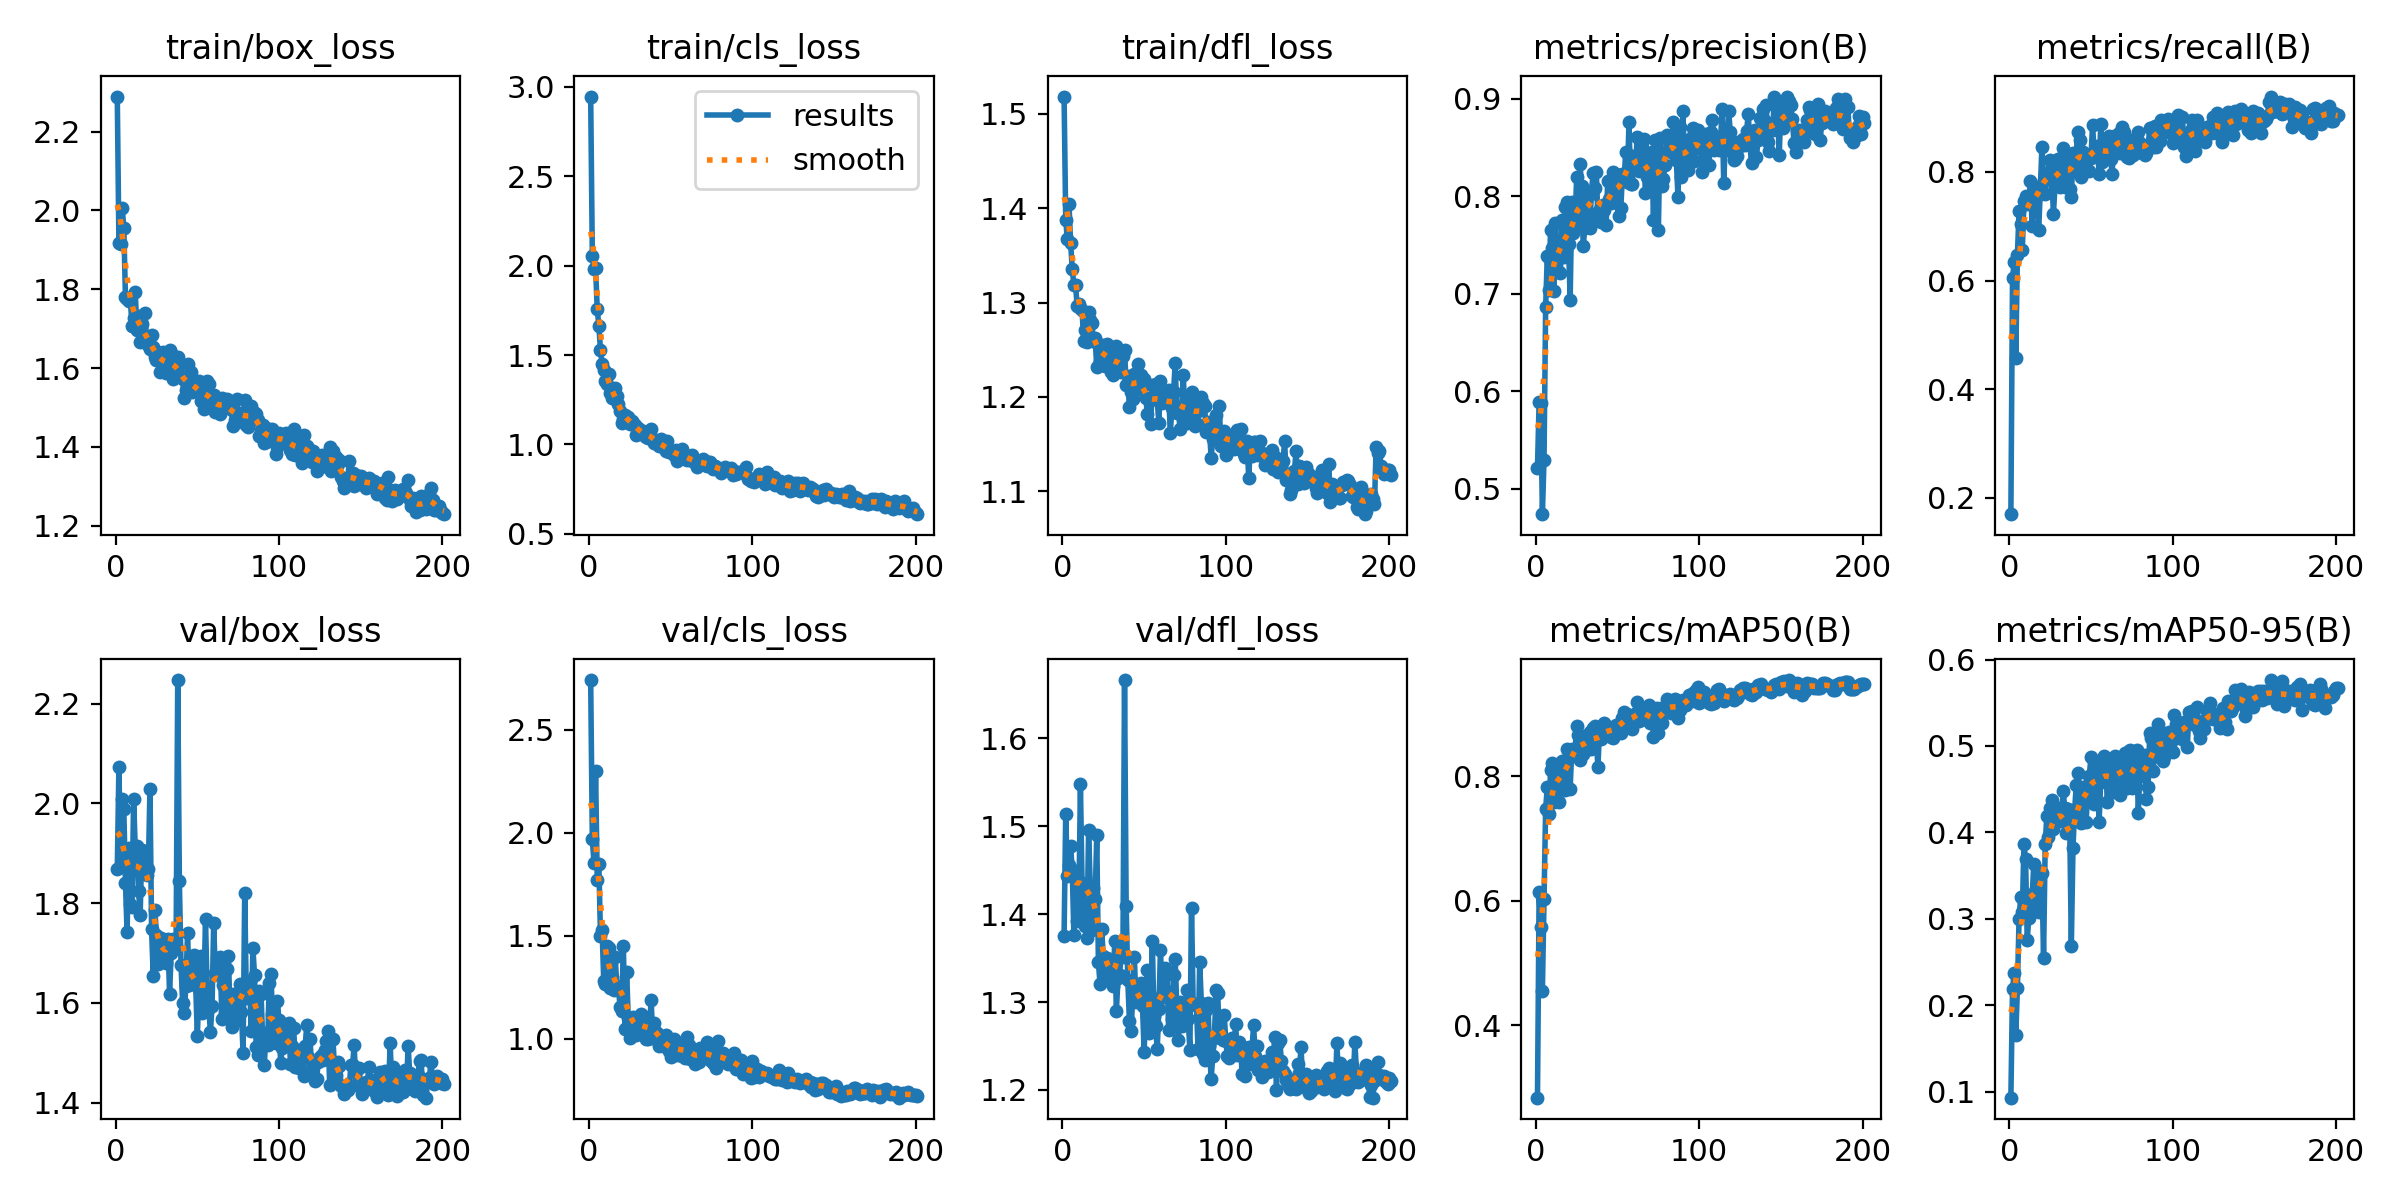

In [ ]:
# выведем результаты тренировки
display.Image(filename='/content/runs/detect/train/results.png', width=600)

Графики обучения демонстрируют плавное снижение потерь и повышение метрик точности, что указывает на стабильный процесс обучения модели.

## Оценка модели

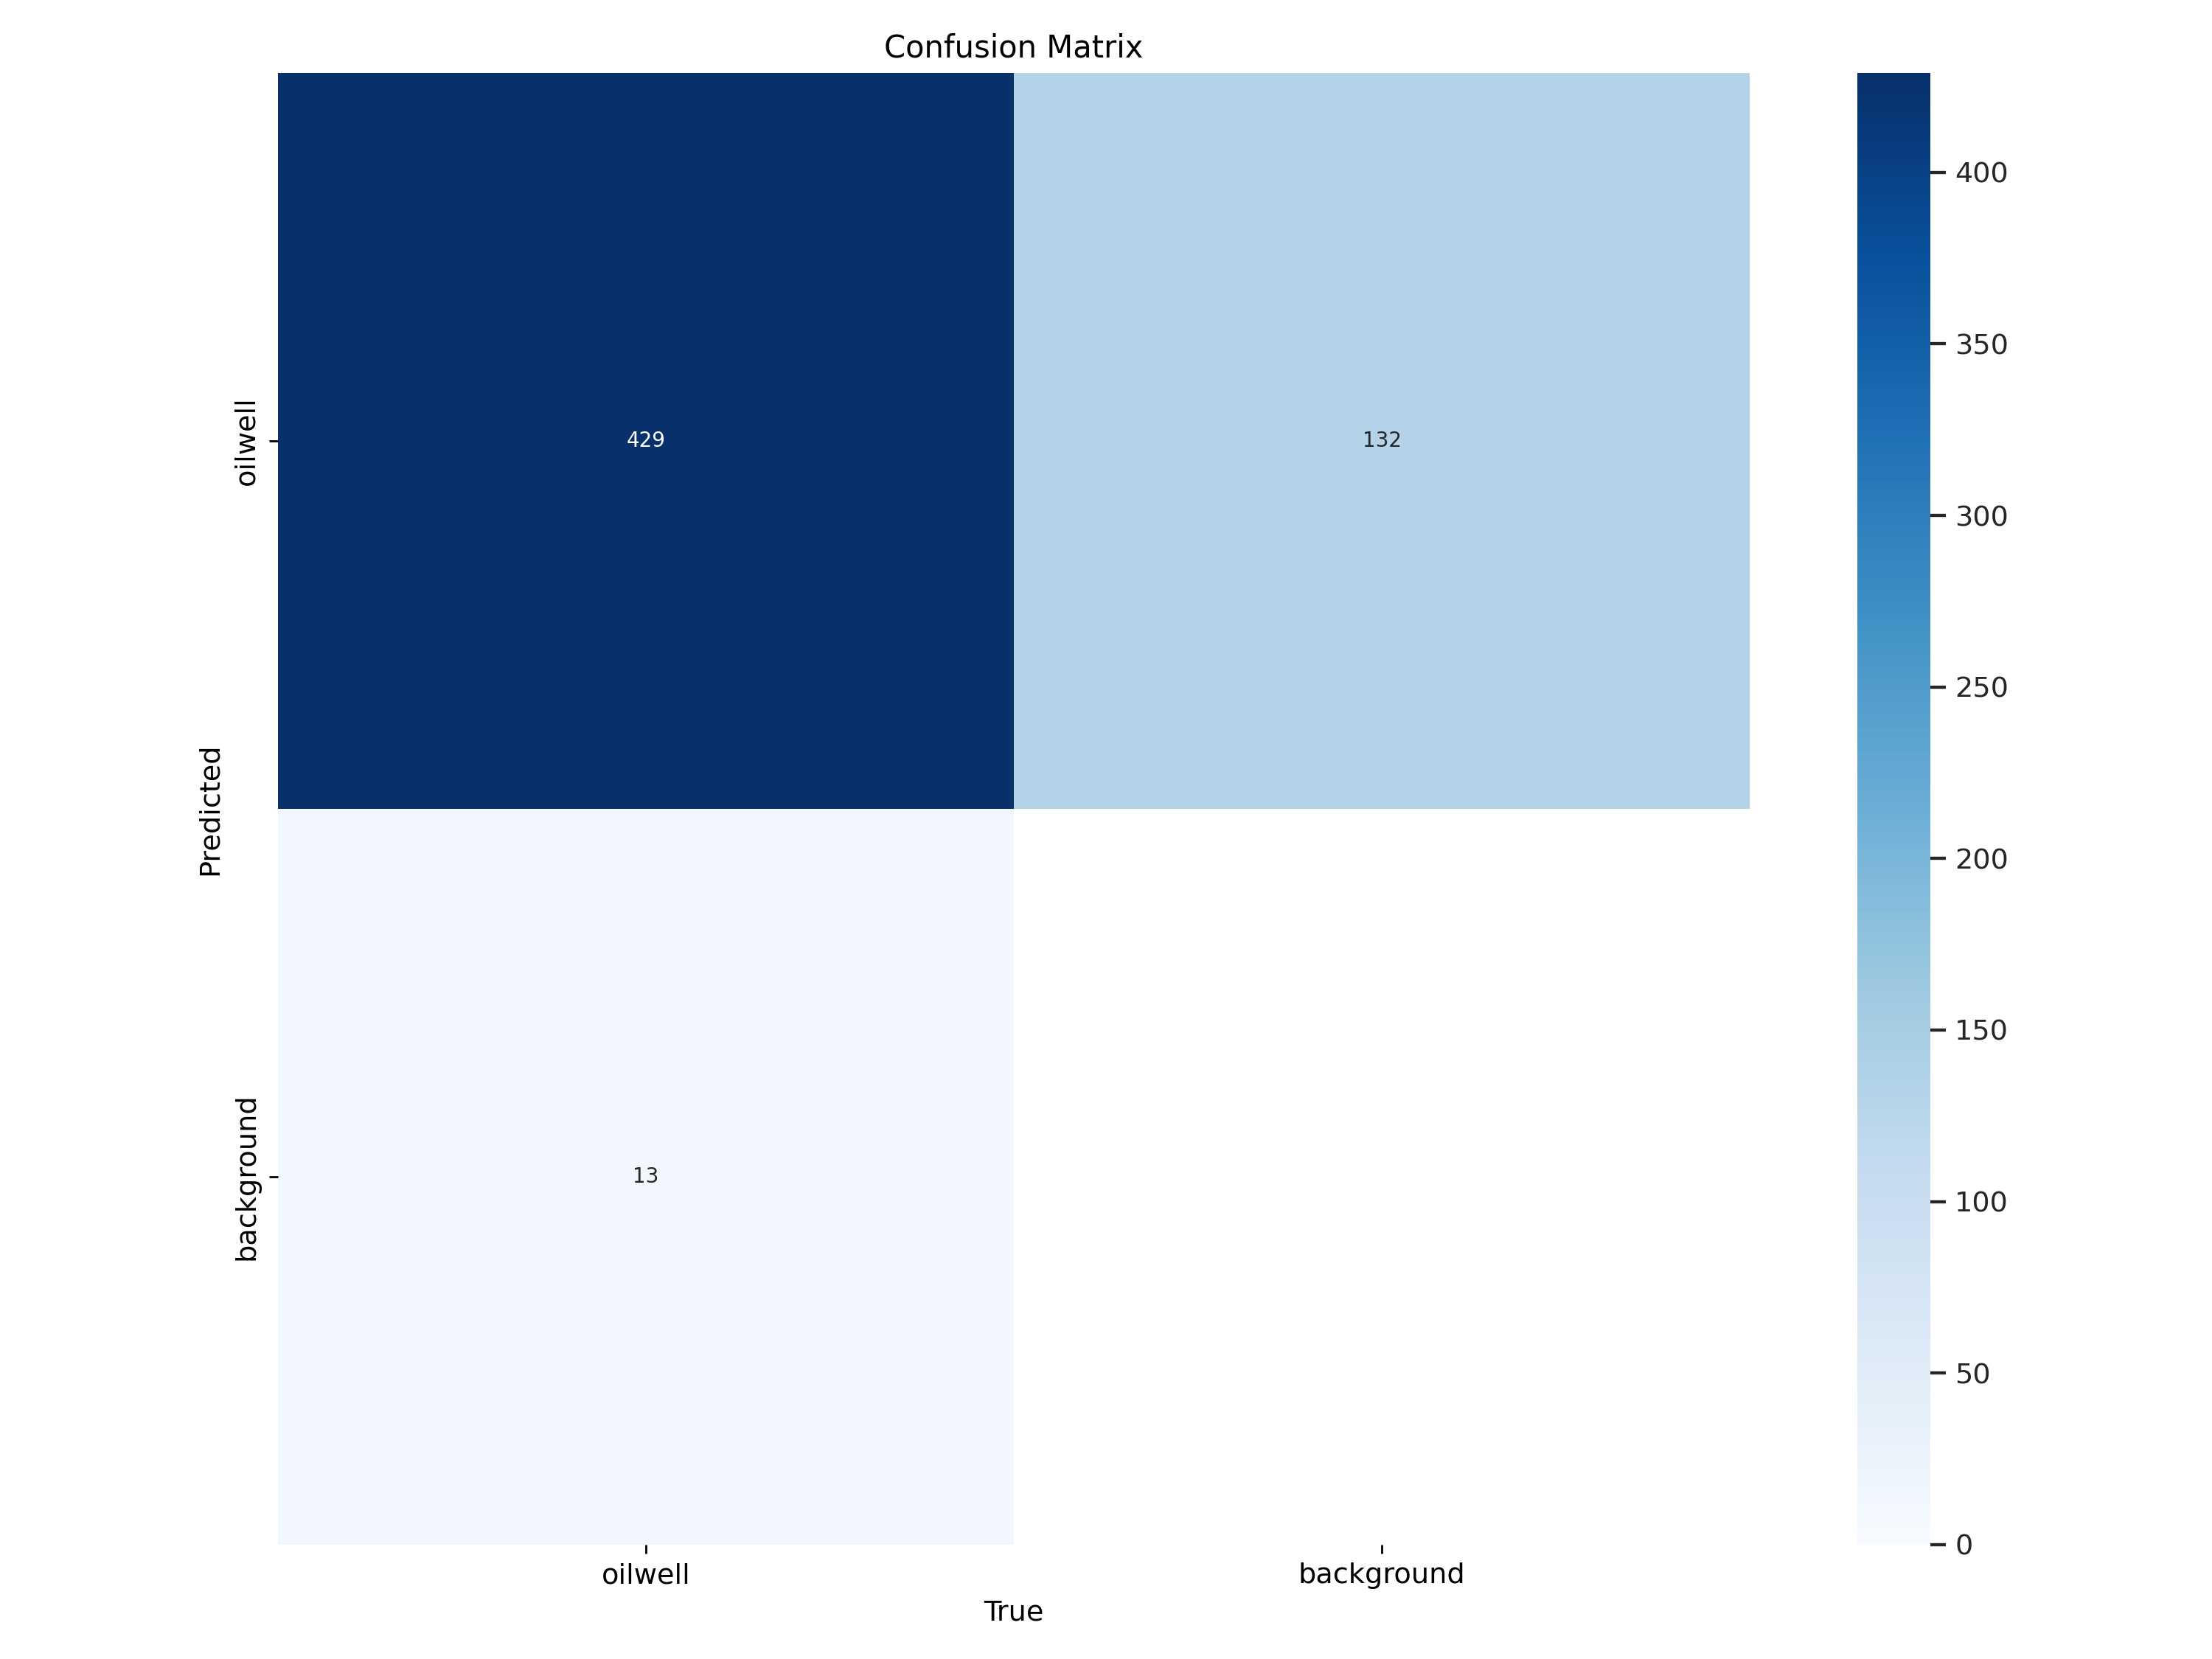

In [ ]:
# выведем матрицу ошибок
display.Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

Модель хорошо детектирует скважины, маленький процент пропущенных скважин. Необходимо разобраться с ложноположительными.

In [ ]:
# посмотрим метрики на тестовой выборке
metrics = model.val(split='test')

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/wells-5/test/labels... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<00:00, 360.53it/s]

val: New cache created: /content/wells-5/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]


                   all         56        246      0.866      0.841      0.931      0.563
Speed: 2.7ms preprocess, 24.3ms inference, 0.0ms loss, 9.1ms postprocess per image
Results saved to runs/detect/train2


Высокая точность: mAP50 на тестовой выборке составил 0.931, что свидетельствует о высокой точности обнаружения скважин.

### Визуализация результатов обнаружения

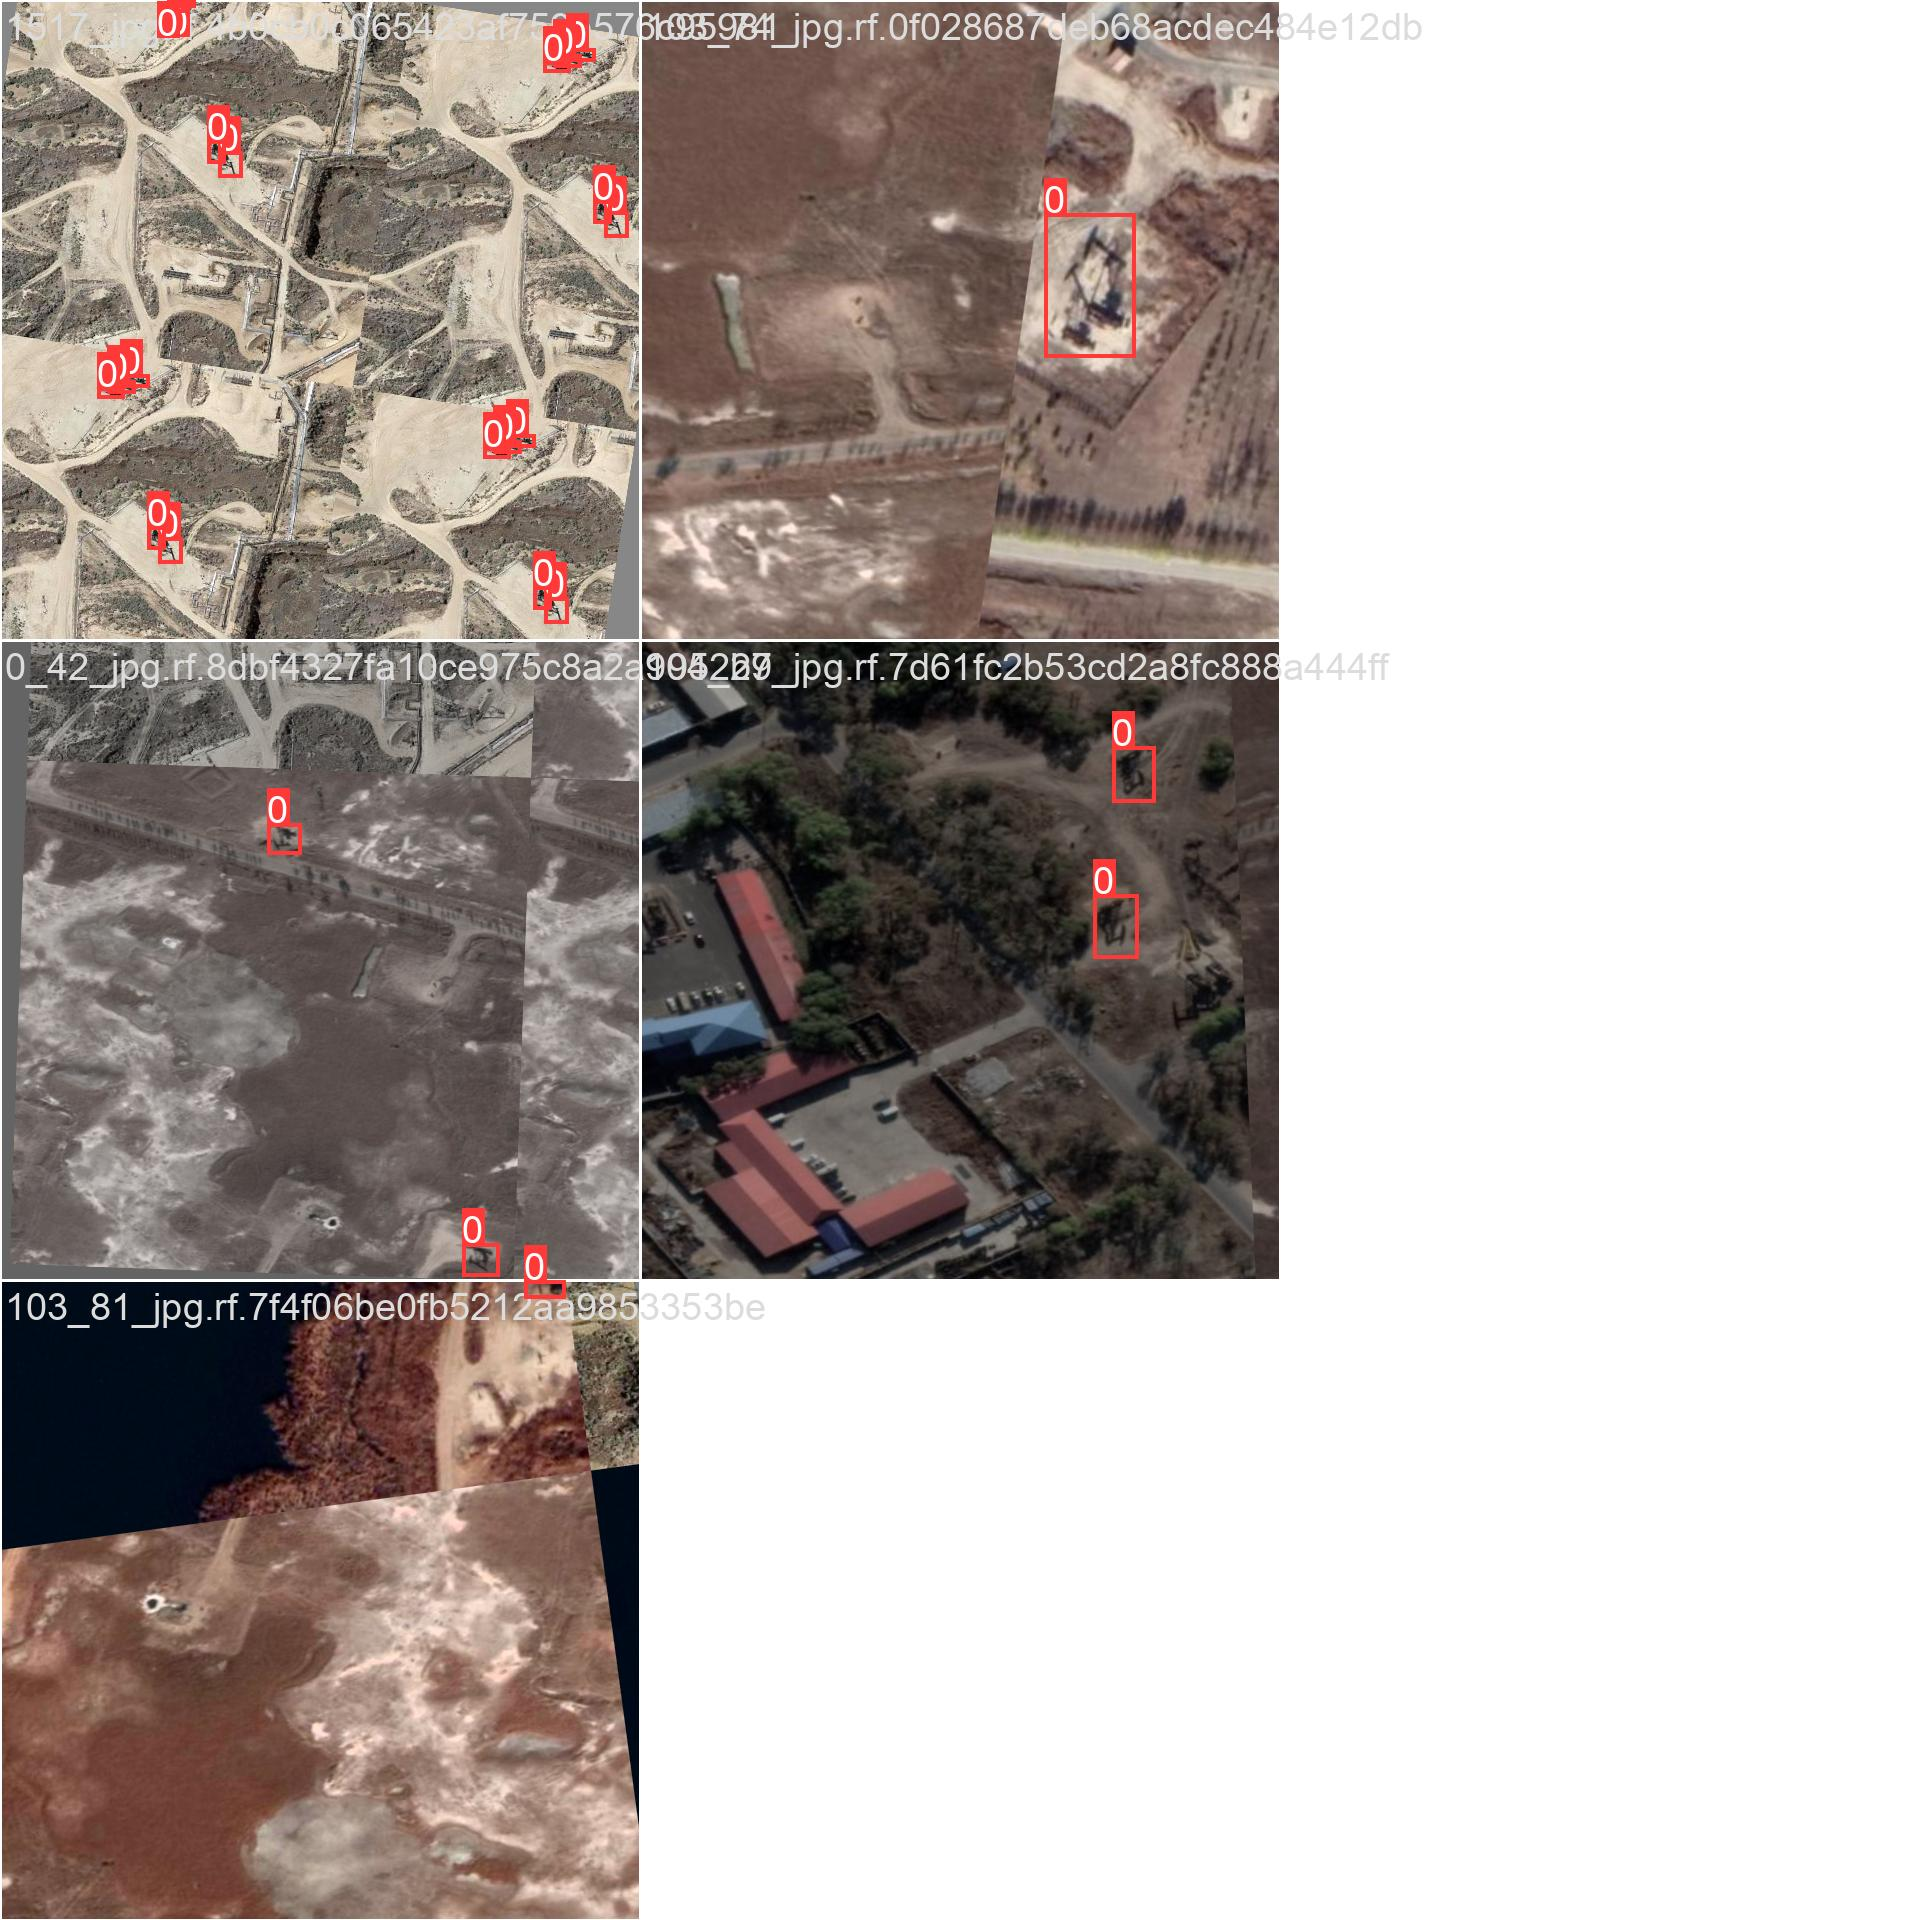

In [ ]:
# выведем тренировочные батчи, увидим аугментации
display.Image(filename='/content/runs/detect/train/train_batch0.jpg', width=600)

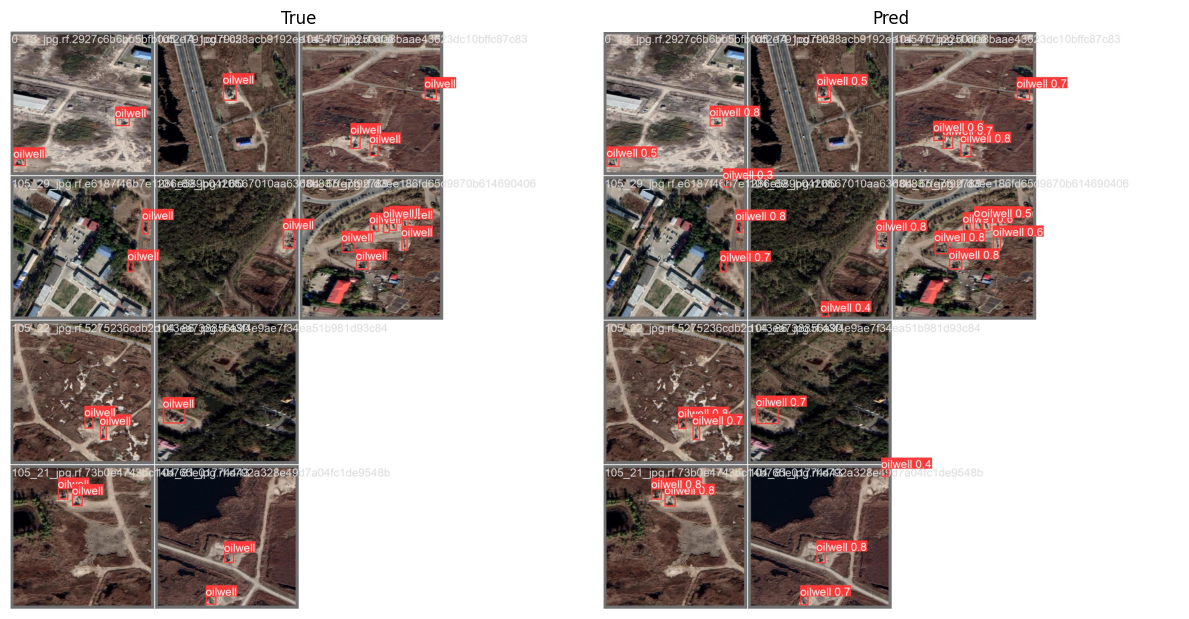

In [ ]:
# Проверим детекцию на валидации
img1 = Image.open('/content/runs/detect/train/val_batch0_labels.jpg')
img2 = Image.open('/content/runs/detect/train/val_batch0_pred.jpg')


fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Выводим первое изображение и подписываем его как "True"
axes[0].imshow(img1)
axes[0].set_title("True")
axes[0].axis('off')

# Выводим второе изображение и подписываем его как "Pred"
axes[1].imshow(img2)
axes[1].set_title("Pred")
axes[1].axis('off')

plt.tight_layout()
plt.show()

У модели трудности с определением перекрывающихся объектов

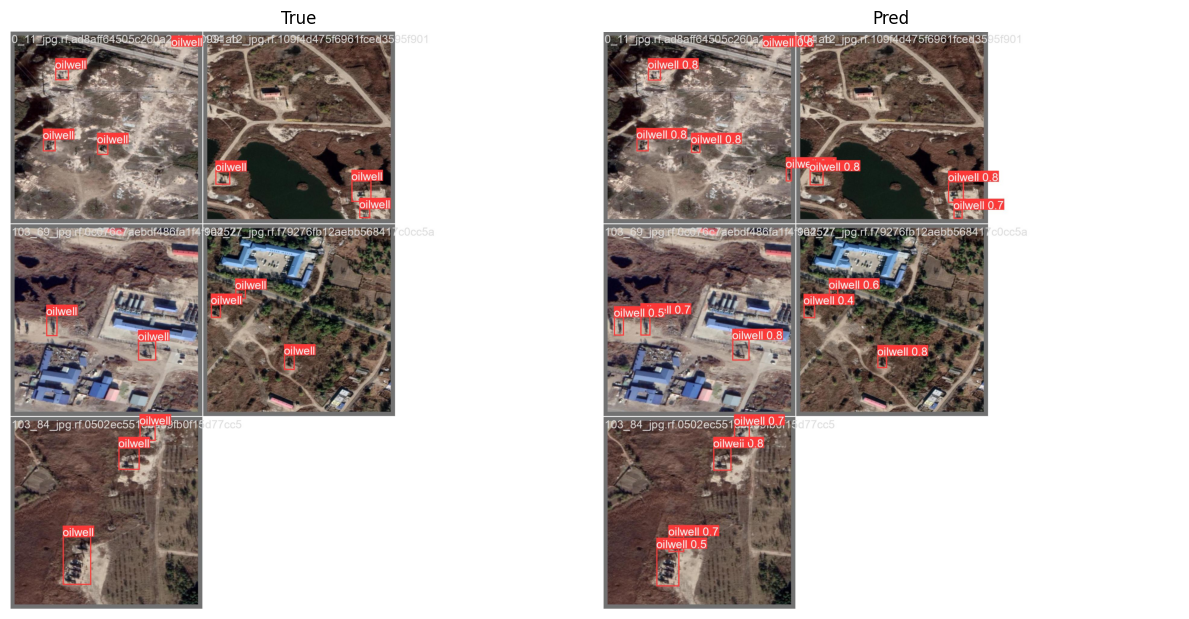

In [ ]:
# Проверим детекцию на валидации
img1 = Image.open('/content/runs/detect/train2/val_batch0_labels.jpg')
img2 = Image.open('/content/runs/detect/train2/val_batch0_pred.jpg')


fig, axes = plt.subplots(1, 2, figsize=(12, 7))  # Измените размер, если необходимо

# Выводим первое изображение и подписываем его как "True"
axes[0].imshow(img1)
axes[0].set_title("True")
axes[0].axis('off')

# Выводим второе изображение и подписываем его как "Pred"
axes[1].imshow(img2)
axes[1].set_title("Pred")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Детектор обнаружил даже те скважины, которые не были размечены, отлично!

## Развёртывание модели

**Основным инструментов для создания веб-демо был выбран Streamlit**

[Развернул демо на STREAMLIT](https://well-detector-yolov8-ko3oxyhhgpthwubuhvjdmt.streamlit.app/)

Код лежит в [GitHub](https://github.com/statsenko-na/well-detector-yolov8/tree/main)  
Сделал две страницы:  
1) Описание проекта  
2) Сам детектор  

К сожалению не получилось сделать страницу с API спутниковой карты с извлечением снимка. Проблема конкретно в создании скриншота, нужно продвинутое знание JS.



### Встраивание модели-детектора в демо

In [ ]:
'''
from ultralytics import YOLO

try:
    model = YOLO(model_path)
    # st.write("Model loaded successfully!")
except Exception as ex:
    st.error(
        f"Unable to load model. Check the specified path: {model_path}")
    st.error(ex)
'''

'\nfrom ultralytics import YOLO\n\ntry:\n    model = YOLO(model_path)\n    # st.write("Model loaded successfully!")\nexcept Exception as ex:\n    st.error(\n        f"Unable to load model. Check the specified path: {model_path}")\n    st.error(ex)\n'

## Тестирование

Ниже примеры скриншотов:

In [ ]:
file_path = 'result.zip'

# Проверка наличия файла
if not os.path.exists(file_path):
    # URL для скачивания файла
    url = 'https://drive.google.com/file/d/19iu13-mMVu85KSjvdpyZlO8ZAkKhRzbr/view?usp=drive_link'
    # Загрузка файла
    gdown.download(url=url, output=file_path, quiet=False, fuzzy=True)

else:
    print(f"Файл {file_path} уже существует.")

Downloading...
From: https://drive.google.com/uc?id=19iu13-mMVu85KSjvdpyZlO8ZAkKhRzbr
To: /content/result.zip
100%|██████████| 943k/943k [00:00<00:00, 37.0MB/s]


In [ ]:
# Указываем путь к zip-файлу и каталогу для извлечения файлов
zip_path = '/content/result.zip'
extract_to = '/content'

# Распаковываем архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Проверяем содержимое каталога, куда были извлечены файлы
os.listdir(extract_to)

['.config', 'wells-5', 'yolov8n.pt', 'image', 'runs', 'result.zip']

#### Пример 1. Сделанный вручную снимок с Google Maps - локация Техас-1
Детектор отработал хорошо.

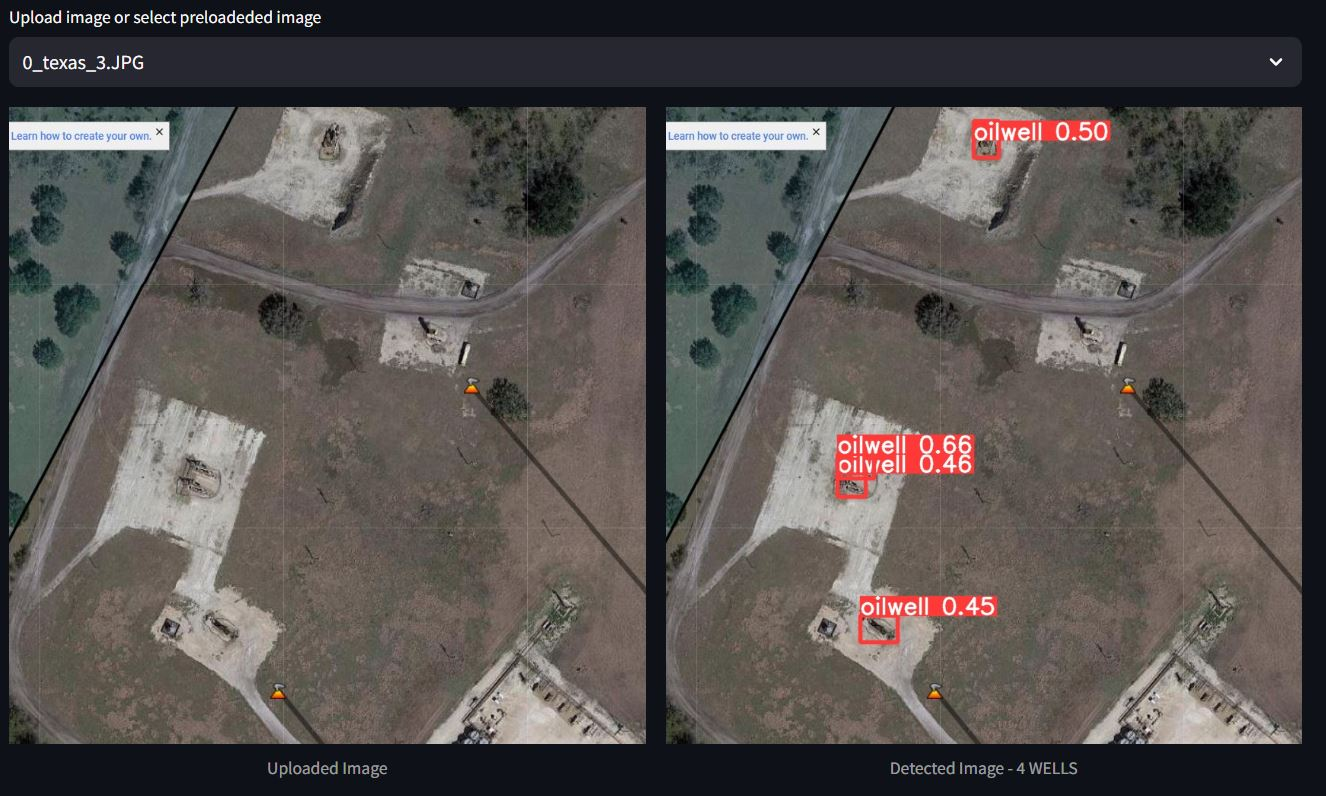

In [ ]:
display.Image(filename='/content/image/0_texas_3.JPG', width=1000)

#### Пример 2. Сделанный вручную снимок с Google Maps - локация Техас-2


Отметил лишнюю бочку. Не увидел одну скважину в правом нижнем углу. Настройки не помогли.

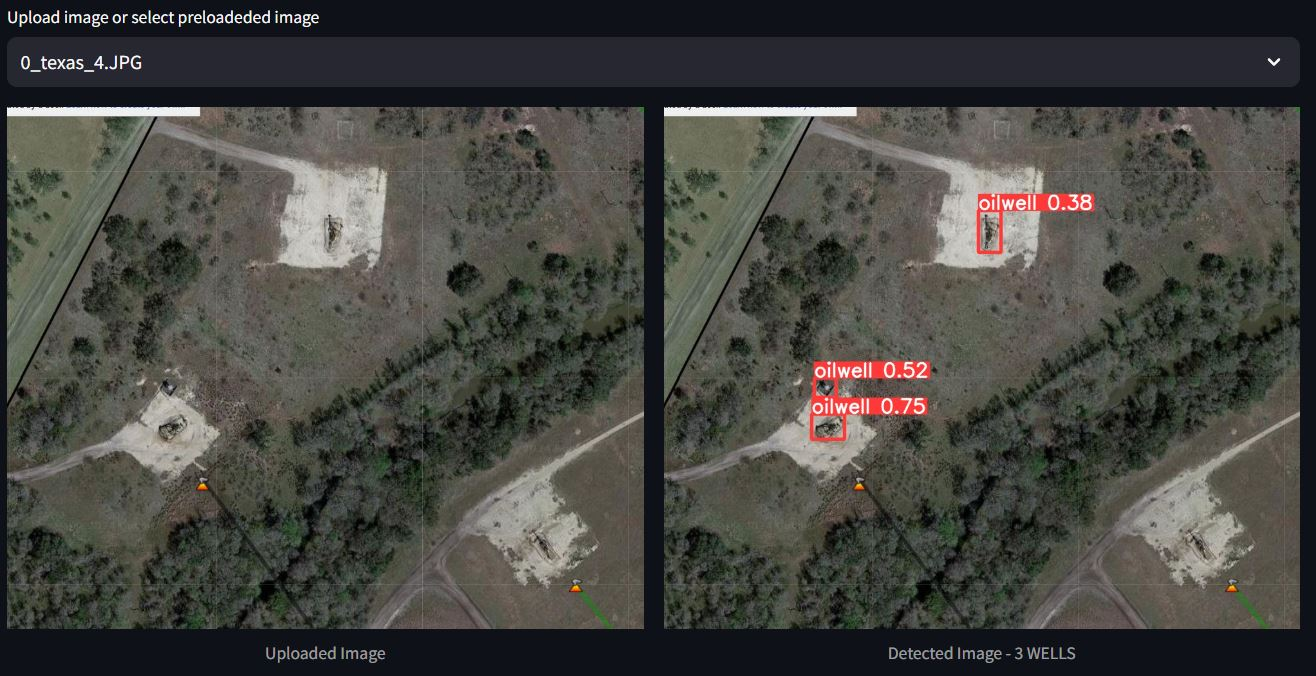

In [ ]:
display.Image(filename='/content/image/0_texas_4.JPG', width=1000)

#### Пример 3. Сделанный вручную снимок с Google Maps - локация Техас-3


* Обнаружил 4 скважины
* 1 отметкамложноположительная - это oil tank, они сверху из-за тени похожи на качалку  
* Не обнаружил 2 скважины

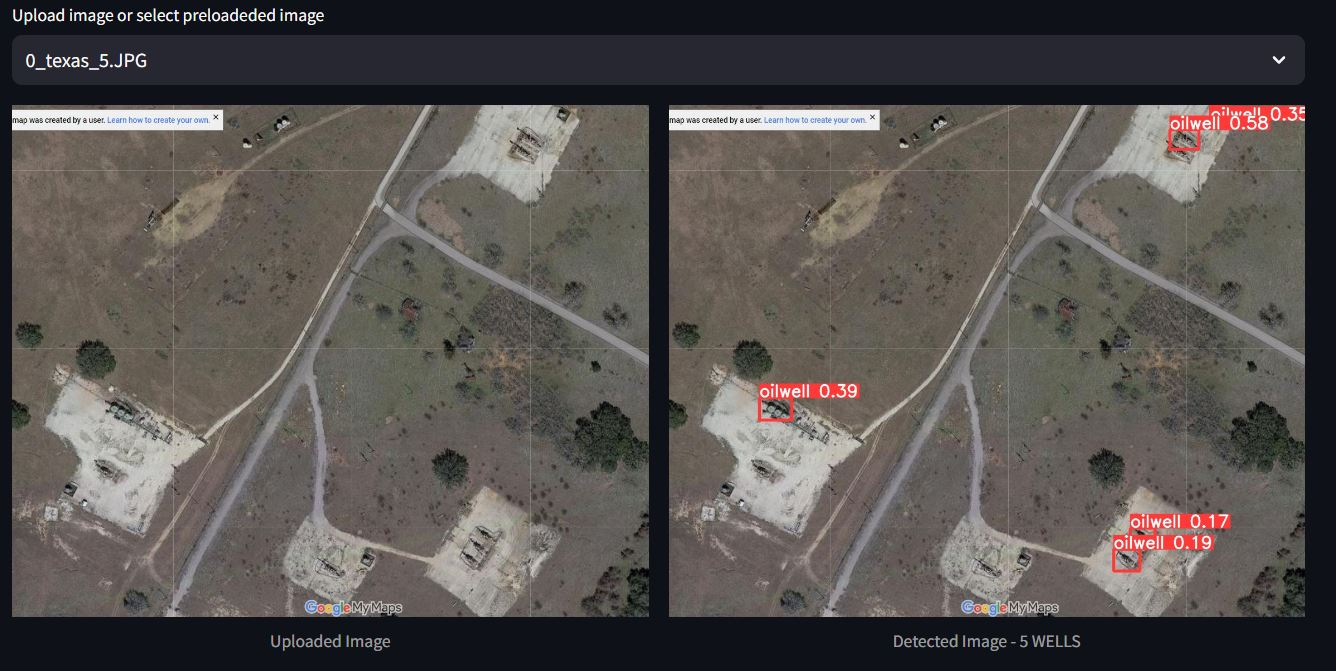

In [ ]:
 display.Image(filename='/content/image/texas_5.JPG', width=1000)

#### Пример 4. Сделанный вручную снимок с Google Maps - локация Татарстан-1


Нашел скважину, еще возможно есть вторая, но даже на глаз сложно определить. Обнаружил только после сильного снижения уверенности.

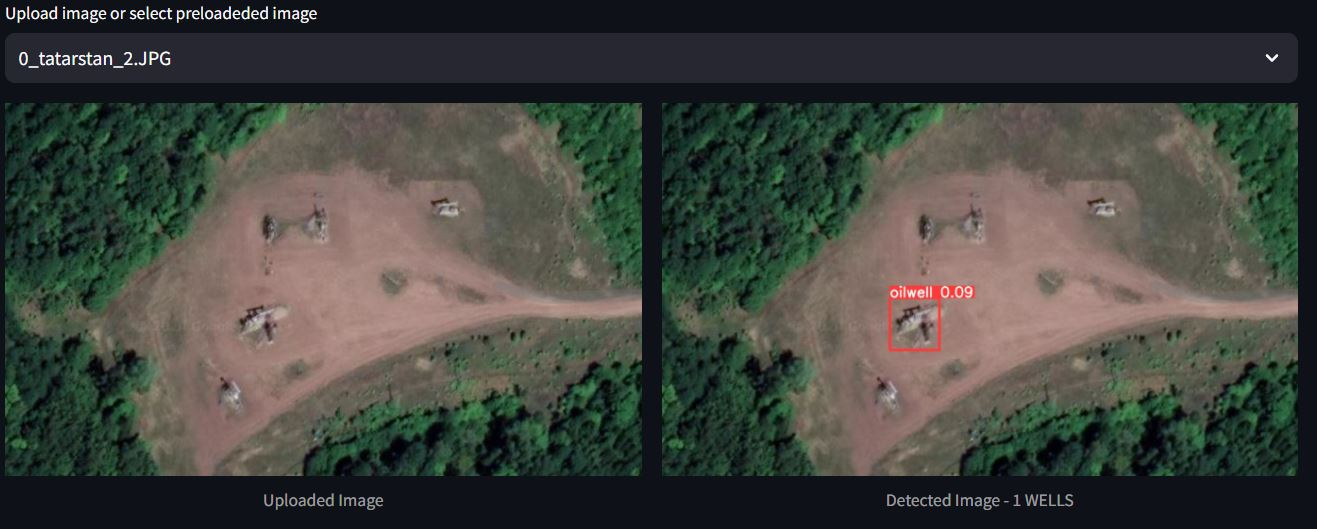

In [ ]:
display.Image(filename='/content/image/tatarstan_1.JPG', width=1000)

#### Пример 5. Сделанный вручную снимок с Google Maps - локация Татарстан-2


Детектор отработал хорошо.

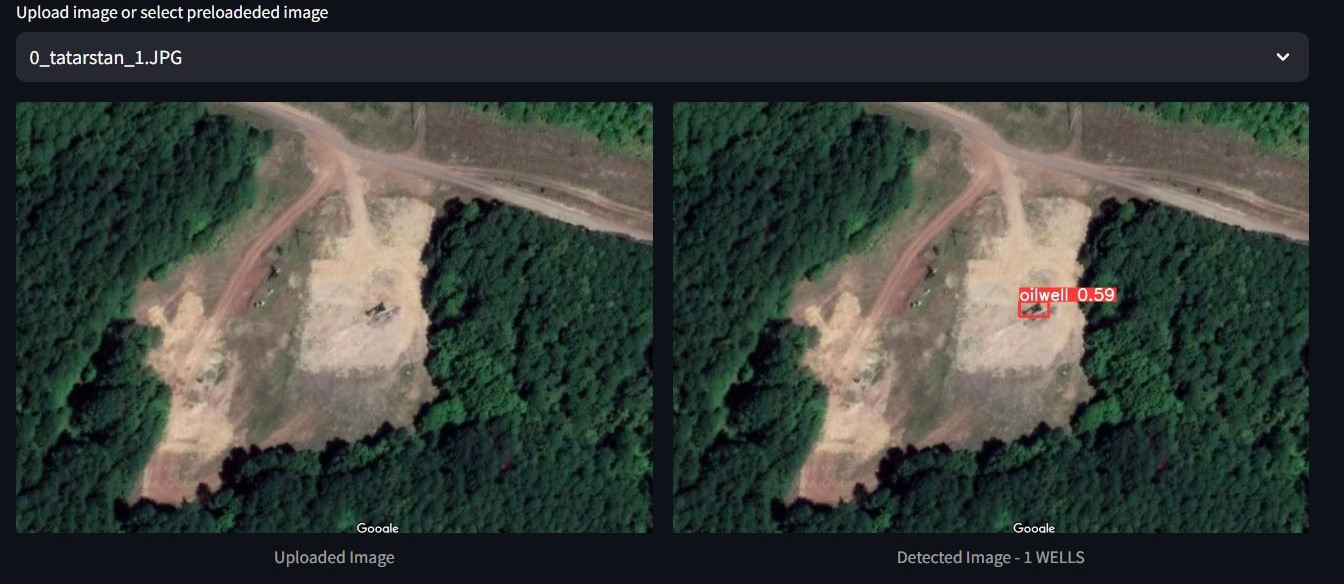

In [ ]:
display.Image(filename='/content/image/tatarstan_2.JPG', width=1000)

#### Пример 6. Тестовый сет - 1512.jpg


Детектор отработал неплохо, почти все объекты нашел, но 3 ложноположительных.

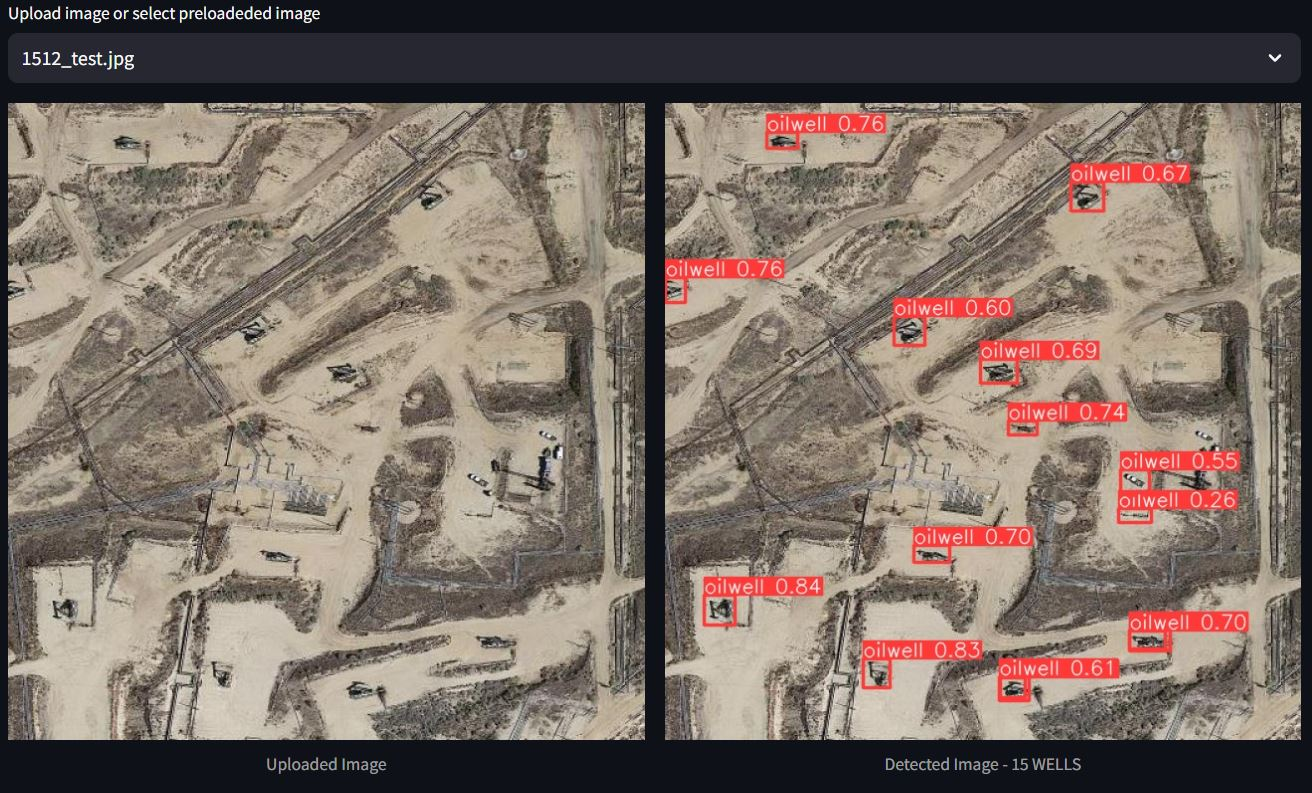

In [ ]:
display.Image(filename='/content/image/1512.JPG', width=1000)

## Выводы

Модель YOLOv8 продемонстрировала впечатляющую способность обнаруживать нефтяные скважины на спутниковых снимках, достигнув точности 0.931 mAP50 на тестовой выборке. Однако, несмотря на высокий результат, задача обнаружения скважин остается сложной из-за ряда факторов:

* Вариативность данных: спутниковые снимки характеризуются разным качеством, масштабом и разрешением. Скважины, являясь маленькими объектами, занимают небольшую площадь на изображениях, что затрудняет извлечение их характерных признаков.
* Сложные условия съемки: тени, время суток, изменчивость фона и ландшафта, а также наличие других объектов инфраструктуры создают дополнительные сложности для модели.
* Перекрытия: перекрытие скважин друг с другом или другими объектами приводит к ошибкам обнаружения и затрудняет точное определение границ объектов.
* Датасет: Для обучения модели был использован объединенный датасет из 562 изображений, собранных в трех локациях: Калифорния, Дацин, Хуатугоу и Чанцин. Эти регионы характеризуются хорошей видимостью и контрастными изображениями. Для повышения обобщающей способности модели в будущем необходимо расширить датасет за счет включения снимков с более разнообразными условиями съемки и типами ландшафта.

Модель была успешно развернута на платформе Streamlit, что позволяет продемонстрировать ее возможности и недостатки в виде интерактивного веб-приложения.